In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import pickle
from sklearn.preprocessing import LabelEncoder

# Load the dataset


# Load the dataset
df = pd.read_csv('Housing.csv')

# Encode categorical variables (mainroad, airconditioning, prefarea)
label_encoder = LabelEncoder()
categorical_columns = ['mainroad', 'airconditioning', 'prefarea']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Define the features (X) and target (y) based on required columns
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'airconditioning', 'parking', 'prefarea']]
y = df['price']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
# Evaluation metrics
mse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Save the trained model
# with open('linear_model.pkl', 'wb') as f:
#     pickle.dump(linear_model, f)


Linear Regression:
Mean Squared Error: 1381117.6493139819
Mean Absolute Error: 1029010.287447318
R-squared: 0.6226215349128174


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
# Standardize the features
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
scalar_y = MinMaxScaler()
y_train_scaled = scalar_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scalar_y.transform(y_test.values.reshape(-1, 1))

y_train_sc = y_train_scaled.ravel()
y_test_sc = y_test_scaled.ravel()
pickle.dump(scaler_X, open('X_scaler.pkl', 'wb'))
pickle.dump(scalar_y, open('y_scaler.pkl', 'wb'))
# print(X_train_scaled)

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pickle
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('Housing.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 
                       'prefarea', 'furnishingstatus']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Define the features (X) and target (y)
X = df.drop(columns=['price'])
y = df['price']


# Define the model
linear_model = LinearRegression()

# Set up the parameter grid for GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'n_jobs': [None, -1],  # Use all available CPUs for training
    'positive': [True, False]
}

# Perform GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train_sc)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test_sc, y_pred)
mae = mean_absolute_error(y_test_sc, y_pred)
r2 = r2_score(y_test_sc, y_pred)

print("Linear Regression (Best Model):")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Save the trained model
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


Best parameters: {'fit_intercept': True, 'n_jobs': None, 'positive': False}
Linear Regression (Best Model):
Mean Squared Error: 0.0173014599659554
Mean Absolute Error: 0.09800097975688749
R-squared: 0.6226215349128166


In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# Decision Tree model
tree_model = DecisionTreeRegressor()

# Set up the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']  # corrected criterion
}

# Perform GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train_sc)

# Best parameters from GridSearchCV
best_params_tree = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params_tree)

# Get the best model from GridSearchCV
best_tree_model = grid_search.best_estimator_

# Make predictions
y_pred_tree = best_tree_model.predict(X_test_scaled)

# Evaluation metrics
mse_tree = mean_squared_error(y_test_sc, y_pred_tree)
mae_tree = mean_absolute_error(y_test_sc, y_pred_tree)
r2_tree = r2_score(y_test_sc, y_pred_tree)

print("\nDecision Tree:")
print(f"Mean Squared Error: {mse_tree}")
print(f"Mean Absolute Error: {mae_tree}")
print(f"R-squared: {r2_tree}")

# Save the trained model
with open('tree_model.pkl', 'wb') as f:
    pickle.dump(best_tree_model, f)


Best parameters: {'criterion': 'absolute_error', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}

Decision Tree:
Mean Squared Error: 0.027333304026503566
Mean Absolute Error: 0.12015749235474006
R-squared: 0.40380752031444866


In [59]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train_sc)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation metrics
mse_rf = root_mean_squared_error(y_test_sc, y_pred_rf)
mae_rf = mean_absolute_error(y_test_sc, y_pred_rf)
r2_rf = r2_score(y_test_sc, y_pred_rf)

print("\nRandom Forest:")
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared: {r2_rf}")

# Save the trained model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)



Random Forest:
Mean Squared Error: 0.13753518752468652
Mean Absolute Error: 0.10058594268239406
R-squared: 0.5874068537729025


In [60]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages to use
    'learning_rate': [0.01, 0.05, 0.1],  # Step size for each boosting step
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

# Perform GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train_sc)

# Best parameters from GridSearchCV
best_params_gb = grid_search.best_params_

print("Best parameters:", best_params_gb)

# Get the best model from GridSearchCV
best_gb_model = grid_search.best_estimator_

# Make predictions
y_pred_gb = best_gb_model.predict(X_test_scaled)

# Evaluation metrics
mse_gb = mean_squared_error(y_test_sc, y_pred_gb)
mae_gb = mean_absolute_error(y_test_sc, y_pred_gb)
r2_gb = r2_score(y_test_sc, y_pred_gb)

print("\nGradient Boosting:")
print(f"Mean Squared Error: {mse_gb}")
print(f"Mean Absolute Error: {mae_gb}")
print(f"R-squared: {r2_gb}")

# Save the trained model
with open('gb_model.pkl', 'wb') as f:
    pickle.dump(best_gb_model, f)


Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Gradient Boosting:
Mean Squared Error: 0.01788069941020051
Mean Absolute Error: 0.09848185715075794
R-squared: 0.6099871969542107


In [61]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# Support Vector Regressor model
svr_model = SVR()

# Set up the parameter grid for GridSearchCV
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'C': [0.1, 1, 10],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.2],  # Epsilon parameter for margin of tolerance
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Perform GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train_sc)

# Best parameters from GridSearchCV
best_params_svr = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params_svr)

# Get the best model from GridSearchCV
best_svr_model = grid_search.best_estimator_

# Make predictions
y_pred_svr = best_svr_model.predict(X_test_scaled)

# Evaluation metrics
mse_svr = mean_squared_error(y_test_sc, y_pred_svr)
mae_svr = mean_absolute_error(y_test_sc, y_pred_svr)
r2_svr = r2_score(y_test_sc, y_pred_svr)

print("\nSupport Vector Regressor:")
print(f"Mean Squared Error: {mse_svr}")
print(f"Mean Absolute Error: {mae_svr}")
print(f"R-squared: {r2_svr}")

# Save the trained model
with open('svr_model.pkl', 'wb') as f:
    pickle.dump(best_svr_model, f)


Best parameters: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

Support Vector Regressor:
Mean Squared Error: 0.01842631671700224
Mean Absolute Error: 0.09944610011121291
R-squared: 0.5980862231536757


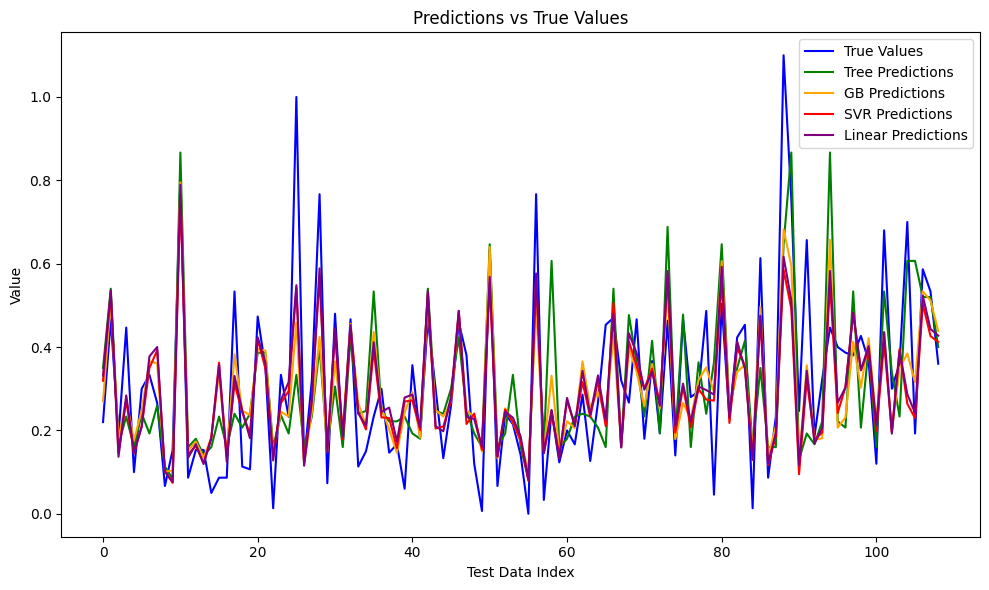

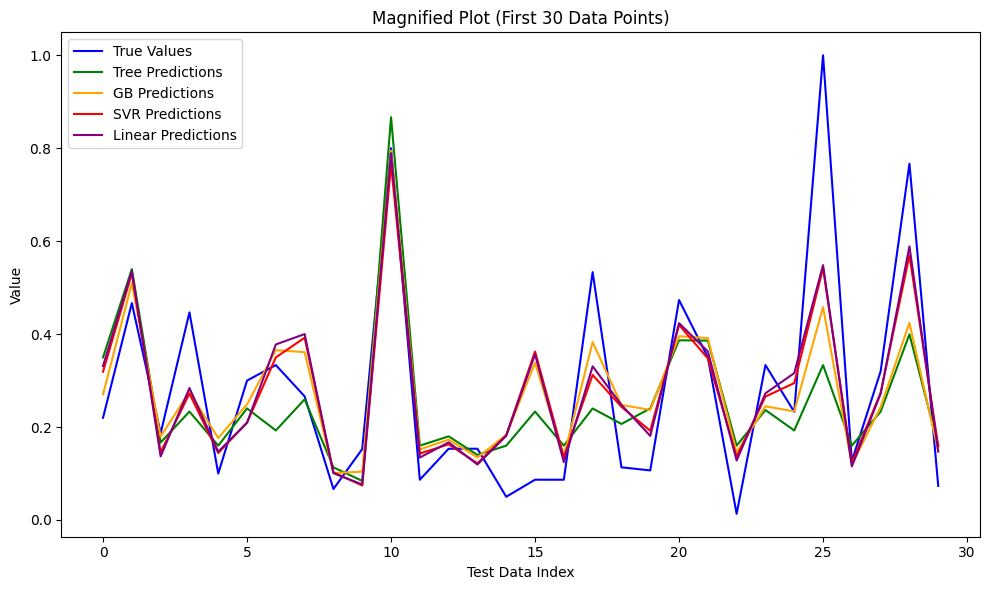

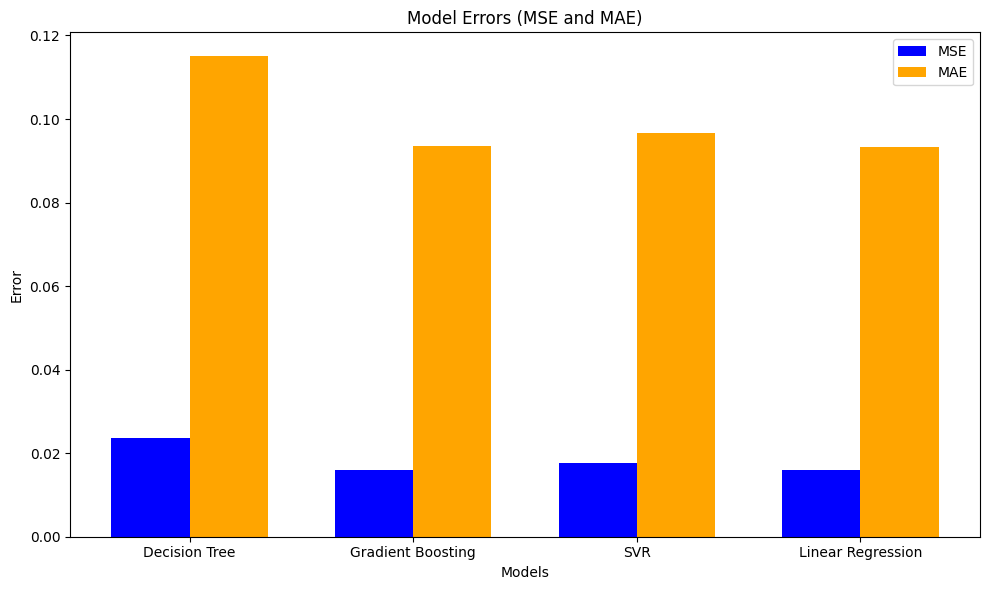

In [63]:

import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the models
with open('tree_model.pkl', 'rb') as f:
    tree_model = pickle.load(f)

with open('gb_model.pkl', 'rb') as f:
    gb_model = pickle.load(f)

with open('svr_model.pkl', 'rb') as f:
    svr_model = pickle.load(f)

with open('linear_model.pkl', 'rb') as f:
    linear_model = pickle.load(f)


# Make predictions
y_pred_tree = tree_model.predict(X_test_scaled)
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_svr = svr_model.predict(X_test_scaled)
y_pred_linear = linear_model.predict(X_test_scaled)

# Calculate errors
mse_tree = mean_squared_error(y_test_sc, y_pred_tree)
mse_gb = mean_squared_error(y_test_sc, y_pred_gb)
mse_svr = mean_squared_error(y_test_sc, y_pred_svr)
mse_linear = mean_squared_error(y_test_sc, y_pred_linear)

mae_tree = mean_absolute_error(y_test_sc, y_pred_tree)
mae_gb = mean_absolute_error(y_test_sc, y_pred_gb)
mae_svr = mean_absolute_error(y_test_sc, y_pred_svr)
mae_linear = mean_absolute_error(y_test_sc, y_pred_linear)

# Plot predictions vs true values for all models in one plot
plt.figure(figsize=(10, 6))
plt.plot(y_test_sc, label='True Values', color='blue')
plt.plot(y_pred_tree, label='Tree Predictions', color='green')
plt.plot(y_pred_gb, label='GB Predictions', color='orange')
plt.plot(y_pred_svr, label='SVR Predictions', color='red')
plt.plot(y_pred_linear, label='Linear Predictions', color='purple')
plt.title('Predictions vs True Values')
plt.xlabel('Test Data Index')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

# Magnified plot: showing a window of 30 data points
plt.figure(figsize=(10, 6))
window_size = 30
plt.plot(y_test_sc[:window_size], label='True Values', color='blue')
plt.plot(y_pred_tree[:window_size], label='Tree Predictions', color='green')
plt.plot(y_pred_gb[:window_size], label='GB Predictions', color='orange')
plt.plot(y_pred_svr[:window_size], label='SVR Predictions', color='red')
plt.plot(y_pred_linear[:window_size], label='Linear Predictions', color='purple')
plt.title('Magnified Plot (First 30 Data Points)')
plt.xlabel('Test Data Index')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting model errors (MSE and MAE) with side-by-side bars
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Width of the bars
index = np.arange(len(models))  # X location for groups

# Set the positions for the MSE and MAE bars
plt.bar(index, mse_errors, bar_width, label='MSE', color='blue')
plt.bar(index + bar_width, mae_errors, bar_width, label='MAE', color='orange')

# Labels and title for the error plot
plt.title('Model Errors (MSE and MAE)')
plt.xlabel('Models')
plt.ylabel('Error')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.tight_layout()
plt.show()
